

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Activity: Perform multiple linear regression" </div>

- [0. Import Library]()
- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Quick Exploring the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)
     
    - [2.3 Diagnostics Analytics](#2.3)
- [3. Data preprocessing](#4)
  
    <!-- - [3.1 Min-Max Scaling or Standardization?](#4.1) -->
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding with sklearn](#5.2)
   - [4.2 Model Building with Statsmodel](#4.2)
       - [4.1.1 Feature selection](#5.2.1)
- [5. Model Evaluation](#6) 


**Multiple linear regression** helps estimate the relationship between one continuous dependent variable and multiple independent variables. This is a valuable skill for data science professionals, enabling them to analyze several factors simultaneously for more comprehensive insights.

In this **activity**, you’ll analyze a small business’s historical marketing data, where each row represents a different promotion involving **TV**, **social media**, **radio**, and **influencers**. Previously, you identified a single predictor for **sales** (**target variable**); now, the business wants to expand the analysis to include multiple variables to better target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

* Exploring and cleaning data
* Using plots and descriptive statistics to select the independent variables
* Creating a fitting multiple linear regression model
* Checking model assumptions
* Interpreting model outputs and communicating the results to non-technical stakeholders

#### 0. Imports

Import relevant Python libraries and modules.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load dataset

You can get the data from this [link](https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G8/main/Dataset/eD_9bdg7RlSR5iJ-kDuc0g_c91ef0ef2c5241f582c8e81efc9b72f1_marketing_sales_data.csv)

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G8/main/Dataset/eD_9bdg7RlSR5iJ-kDuc0g_c91ef0ef2c5241f582c8e81efc9b72f1_marketing_sales_data.csv')

In [12]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


#### 2. Exploratory Data Analysis

##### 2.1 Quick Data Exploration

In [14]:
data.info() ### object = text

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


##### 2.2 Data cleaning

In [19]:
data.isnull().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [23]:
data[data['TV'].isnull()]

,TV,Radio,Social Media,Influencer,Sales
232,NaN,34.111674,4.624148,Nano,342.913372


In [27]:
data[data['Sales'].isnull()]

,TV,Radio,Social Media,Influencer,Sales
443,High,36.466753,5.635992,Mega,NaN


In [25]:
data[data['Radio'].isnull()]

,TV,Radio,Social Media,Influencer,Sales
510,Low,NaN,4.132526,Macro,78.031498


**Familiarize yourself with the data's features**

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)


**Question:** What are some purposes of EDA before constructing a multiple linear regression model?

**Remove missing data**

This dataset contains rows with missing values. To correct this, drop all rows that contain missing data.

In [29]:
data.dropna(inplace=True)

In [33]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


#### 3.2 Diagnostics Analysis

In [35]:
data['TV'].value_counts()

TV
Medium    197
Low       196
High      176
Name: count, dtype: int64

In [37]:
data['Sales'].describe()

count    569.000000
mean     193.457340
std       90.328538
min       31.199409
25%      118.742719
50%      198.521410
75%      267.803610
max      358.420739
Name: Sales, dtype: float64

In [39]:
data.groupby(data['TV'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
TV,,,,,,,,
High,176.0,300.529591,30.665876,248.802379,273.103265,298.240051,327.961999,358.420739
Low,196.0,91.716309,32.513227,31.199409,62.302498,91.942006,120.200064,147.028897
Medium,197.0,199.023461,32.814657,142.416906,166.631361,204.376413,226.068098,251.241492


In [41]:
data.groupby(data['Influencer'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Influencer,,,,,,,,
Macro,130.0,206.641805,87.669791,32.566825,136.942827,213.246312,276.974418,358.420739
Mega,147.0,180.385096,97.884745,32.237030,102.113849,155.041237,271.125265,355.368871
Micro,145.0,198.655080,83.242707,42.719955,130.161047,212.412506,261.966812,356.533252
Nano,147.0,189.742830,90.378982,31.199409,114.014806,192.963887,260.913191,354.292515


**Create a pairplot of the data**

Create a pairplot to visualize the relationship between the continous variables in `data`.

In [49]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


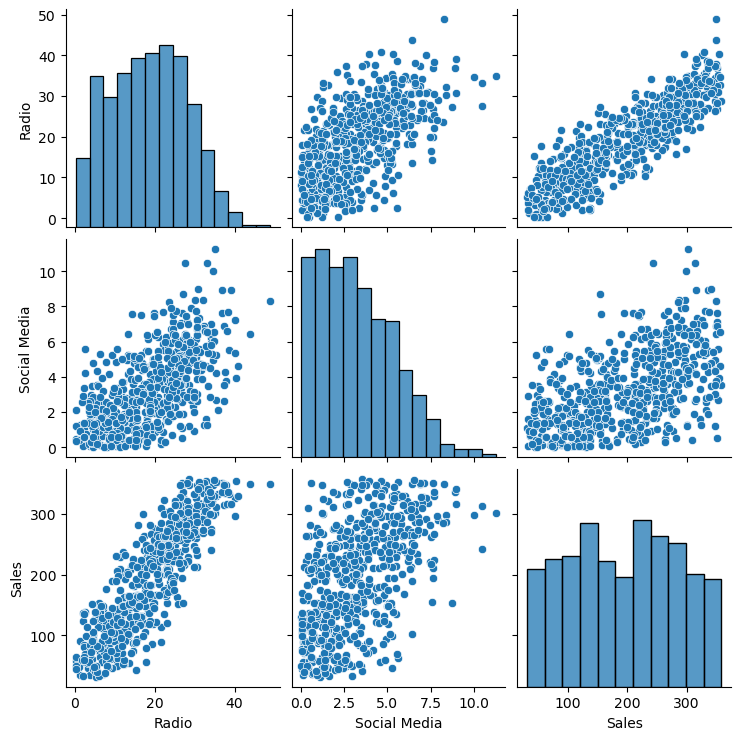

In [47]:
# Create a pairplot of the data.
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data);

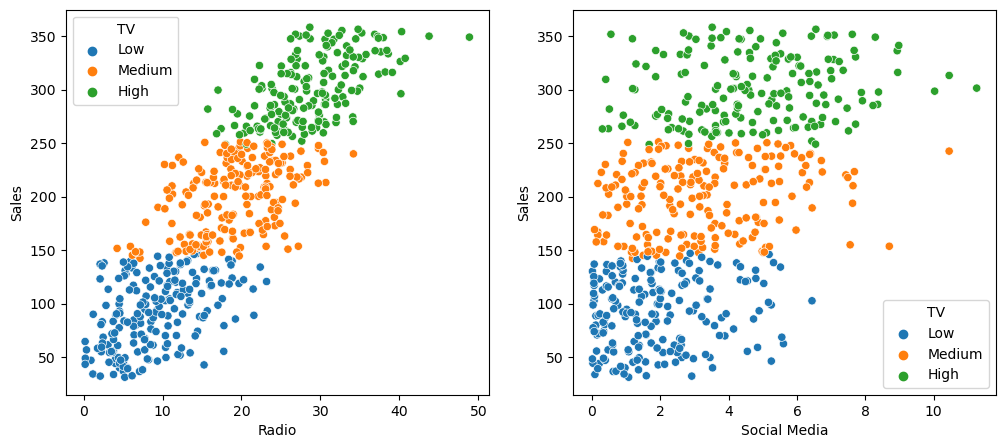

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.scatterplot(x = data['Radio'], y=data['Sales'], ax = ax[0], hue = data['TV'])
# ax[0]
sns.scatterplot(x = data['Social Media'], y=data['Sales'], ax = ax[1], hue = data['TV']);

In [71]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [77]:
data[['Radio','Social Media','Sales']].corr()['Sales']

Radio           0.870158
Social Media    0.531834
Sales           1.000000
Name: Sales, dtype: float64

**Question:** Which variables have a linear relationship with `Sales`? Why are some variables in the data excluded from the preceding plot?



Calculate the describe (mean, min, ...) sales for each categorical variable

There are two categorical variables: `TV` and `Influencer`. To characterize the relationship between the categorical variables and `Sales`, find the mean `Sales` for each category in `TV` and the mean `Sales` for each category in `Influencer`. 

**Question:** What do you notice about the categorical variables? Could they be useful predictors of `Sales`?



In [79]:
df=data.drop(columns='Influencer')

#### 3. Data Preprocessing, 
##### 3.1 Encoding Cateforical Variable

**Clean column names**

### Label Encoding
### one-hot encoding

In [82]:
df.head()

,TV,Radio,Social Media,Sales
0,Low,1.218354,1.270444,90.054222
1,Medium,14.949791,0.274451,222.741668
2,Low,10.377258,0.061984,102.774790
3,High,26.469274,7.070945,328.239378
4,High,36.876302,7.618605,351.807328


In [89]:
df = pd.get_dummies(data = df, columns=['TV'])

In [93]:
df = df.replace({False:0, True:1})

<!-- The `ols()` function doesn't run when variable names contain a space. Check that the column names in `data` do not contain spaces and fix them, if needed. -->

In [96]:
df

,Radio,Social Media,Sales,TV_High,TV_Low,TV_Medium
0,1.218354,1.270444,90.054222,0,1,0
1,14.949791,0.274451,222.741668,0,0,1
2,10.377258,0.061984,102.774790,0,1,0
3,26.469274,7.070945,328.239378,1,0,0
4,36.876302,7.618605,351.807328,1,0,0
...,...,...,...,...,...,...
567,28.210738,4.373466,302.887998,1,0,0
568,23.578661,2.856657,232.555023,0,0,1
569,9.169824,0.067279,73.888838,0,1,0
570,11.563403,1.727947,121.949570,0,1,0


#### 4. Model building

In [98]:
x = df.drop(columns='Sales')
y = df['Sales']

In [ ]:
[Test][Train]

In [100]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=12, test_size=0.2)## train 0.8

In [116]:
X_train

,Radio,Social Media,TV_High,TV_Low,TV_Medium
332,3.799751,2.624138,0,1,0
312,23.216946,4.202648,0,0,1
315,38.203575,6.574379,1,0,0
339,40.194458,5.326762,1,0,0
150,7.143985,1.185990,0,0,1
...,...,...,...,...,...
433,12.522233,0.056340,0,1,0
260,14.623159,3.608015,0,0,1
242,6.856474,0.635843,0,1,0
254,6.110770,1.937175,0,1,0


##### 4.1 Building with Sklearn

In [122]:
from sklearn.linear_model import LinearRegression, LogisticRegression, ARDRegression,BayesianRidge,ElasticNet,Ridge

In [ ]:
train=>, x_train => model <=ytrain 

In [124]:
Linear_model = LinearRegression()

In [126]:
Linear_model.fit(X_train, y_train)

LinearRegression()

In [130]:
Linear_model.coef_

array([  3.03521772,  -0.31530653,  73.66539196, -77.41424619,
         3.74885423])

In [140]:
Linear_model.intercept_

140.82990591259104

##### 4.2 Building with Statsmodel

In [132]:
import statsmodels.api as sm

In [148]:
X_train.rename({'Social Media':'Social_Media'}, axis = 1,inplace=True)

In [150]:
X_train_con = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_con).fit()

In [152]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1165.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          7.78e-236
Time:                        10:46:29   Log-Likelihood:                -2143.0
No. Observations:                 455   AIC:                             4296.
Df Residuals:                     450   BIC:                             4317.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          105.6224      3.477     30.374      0.000      98.788     112.456
Radio            3.0352      0.248     12.231      0.000       2.548       3.523
Social_Media    -0.3153      0.726     -0.434      0.664      -1.743       1.112
TV_High        108.8729      3.904     27.890      0.000     101.201     116.544
TV_Low         -42.2068      2.140    -19.722      0.000     -46.412     -38.001
TV_Medium       38.9563      2.086     18.671      0.000      34.856      43.057
==============================================================================
Omnibus:                       19.983   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.708
Skew:                           0.130   Prob(JB):                      0.00780
Kurtosis:                       2.333   Cond. No.                     1.24e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [154]:
X_train_con = X_train_con.drop(columns=['Social_Media'])

In [156]:
model1 = sm.OLS(y_train, X_train_con).fit()

In [160]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1165.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):          7.78e-236
Time:                        10:47:33   Log-Likelihood:                -2143.0
No. Observations:                 455   AIC:                             4296.
Df Residuals:                     450   BIC:                             4317.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          105.6224      3.477     30.374      0.000      98.788     112.456
Radio            3.0352      0.248     12.231      0.000       2.548       3.523
Social_Media    -0.3153      0.726     -0.434      0.664      -1.743       1.112
TV_High        108.8729      3.904     27.890      0.000     101.201     116.544
TV_Low         -42.2068      2.140    -19.722      0.000     -46.412     -38.001
TV_Medium       38.9563      2.086     18.671      0.000      34.856      43.057
==============================================================================
Omnibus:                       19.983   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.708
Skew:                           0.130   Prob(JB):                      0.00780
Kurtosis:                       2.333   Cond. No.                     1.24e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Fit a multiple linear regression model that predicts sales**

Using the independent variables of your choice, fit a multiple linear regression model that predicts `Sales` using two or more independent variables from `data`.

In [ ]:
# Define the OLS formula.
# Create an OLS model.
# Fit the model.
# Save the results summary.
# Display the model results.

**Question:** Which independent variables did you choose for the model, and why?



#### 5. Check model assumptions

##### 5.1 Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected previously with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

In [ ]:
# Create a scatterplot for each independent variable and the dependent variable.

### YOUR CODE HERE ### 



**Question:** Is the linearity assumption met?


###### 5.2 Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

##### 5.3 Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals

In [65]:
# Calculate the residuals.

# Create a histogram with the residuals. 


**Question:** Is the normality assumption met?



##### 5.4 Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

In [ ]:
# Create a scatterplot with the fitted values from the model and the residuals.

# Add a line at y = 0 to visualize the variance of residuals above and below 0.


**Question:** Is the constant variance assumption met?




### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

In [ ]:
# Create a pairplot of the data.


##### Detecting Multicollinearity
A statistical technique called the **variance inflation factor (VIF)** can detect and measure the amount of collinearity in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated.
- A VIF between 1 and 5 shows that variables are moderately correlated.
- A VIF between 5 and 10 will mean that variables are highly correlated.
  
In practice, a VIF greater than 10 is often used as a rule of thumb to identify variables that may need to be removed or transformed to reduce multicollinearity.

In [ ]:
# Calculate the variance inflation factor (optional).


**Question 8:** Is the no multicollinearity assumption met?



#### Results and evaluation

###### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [ ]:
# Display the model results summary.

**Question:** What is your interpretation of the model's R-squared?


###### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [ ]:
# Display the model results summary.


**Question:** What are the model coefficients?



**Question:** How would you write the relationship between `Sales` and the independent variables as a linear equation?



**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?



**Question:** Why is it important to interpret the beta coefficients?



**Question:** What are you interested in exploring based on your model?



**Question:** Do you think your model could be improved? Why or why not? How?

## Conclusion

**What results can be presented from this lab?**

**How would you frame your findings to external stakeholders?**

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).